# Normalizing data
Main takeaways:
 - In this case Z-Score provided a real advantage, resulting in the best model so far
 - Higher learning rate is preferred with lower feature values
 - MinMax didn't provide an edge over the basic dataset
 
 Known limitations of this notebook:
 - no data preprocessing
 - no test-set-validation

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from helper import charts, lib

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

#scale the label
training_df["median_house_value"] /= 1000.0

#set the label name early
my_label="median_house_value" # the median value of a house on a specific city block.

### Normalizing data with 2 different types of normailization techniques

 - Min Max scaling
 - Z-score

In [3]:
#Min Max scaling
min_df = training_df.min()
max_df = training_df.max()

#Saving label column before normalizing
label_column = training_df[my_label]
labelless_df = training_df.drop(columns=my_label)

#Normalizing
minmax_df = (labelless_df - min_df) / (max_df - min_df)

#Replacing label value
minmax_df[my_label] = label_column

minmax_df.head()

,households,housing_median_age,latitude,longitude,median_house_value,median_income,population,total_bedrooms,total_rooms
0,0.077454,0.274510,0.175345,1.000000,66.9,0.068530,0.028364,0.198945,0.147885
1,0.075974,0.352941,0.197662,0.984064,80.1,0.091040,0.031559,0.294848,0.201608
2,0.019076,0.313725,0.122210,0.975100,85.7,0.079378,0.009249,0.026847,0.018927
3,0.037000,0.254902,0.116897,0.974104,73.4,0.185639,0.014350,0.052142,0.039515
4,0.042921,0.372549,0.109458,0.974104,65.5,0.098281,0.017405,0.050435,0.038276


In [4]:
#Normalizing using Z-score
mean_df = labelless_df.mean()
std_df = labelless_df.std()

z_df = (labelless_df - mean_df)/std_df

z_df[my_label] = label_column
z_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619288,-0.671500,-1.079639,1.361655,1.764152,-0.361173,-0.075996,-1.252506,66.9
1,2.539494,-0.573248,-0.761850,2.296540,3.230346,-0.261858,-0.099401,-1.081451,80.1
2,2.494610,-0.905436,-0.920744,-0.882436,-0.866931,-0.955326,-0.999223,-1.170071,85.7
3,2.489623,-0.928830,-1.159087,-0.524171,-0.480216,-0.796769,-0.715753,-0.362590,73.4
4,2.489623,-0.961581,-0.682402,-0.545731,-0.506313,-0.701809,-0.622130,-1.026424,65.5


In [5]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(6,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, training_df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(
    x=training_df[feature],
    y=training_df[label],
    batch_size=batch_size,
    epochs=epochs)

  return history

In [6]:
# Specify the feature and the label.
my_feature = ["longitude", "latitude", "total_rooms", "total_bedrooms", "population", "households"]

In [29]:
# Hyperparameters for not normalized dataset
learning_rate = 0.001
epoch_count = 20
batch_size = 64

# Build model
basic_model = build_model(learning_rate)
normal_history = train_model(basic_model, training_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/20
266/266 [==============================] - 2s 6ms/step - loss: 309457.8125 - root_mean_squared_error: 556.2894
Epoch 2/20
266/266 [==============================] - 1s 5ms/step - loss: 204529.8906 - root_mean_squared_error: 452.2498
Epoch 3/20
266/266 [==============================] - 1s 5ms/step - loss: 161968.4531 - root_mean_squared_error: 402.4530
Epoch 4/20
266/266 [==============================] - 1s 5ms/step - loss: 125062.6016 - root_mean_squared_error: 353.6419
Epoch 5/20
266/266 [==============================] - 1s 5ms/step - loss: 94458.1719 - root_mean_squared_error: 307.3405
Epoch 6/20
266/266 [==============================] - 1s 5ms/step - loss: 70396.1562 - root_mean_squared_error: 265.3228
Epoch 7/20
266/266 [==============================] - 1s 5ms/step - loss: 52374.0938 - root_mean_squared_error: 228.8539
Epoch 8/20
266/266 [==============================] - 1s 5ms/step - loss: 38713.9961 - root_mean_squared_error: 196.7587
Epoch 9/20
266/266 [========

In [25]:
# Hyperparameters for min max scaled dataset
learning_rate = 0.15
epoch_count = 20
batch_size = 64

# Build model
minmax_model = build_model(learning_rate)
minmax_history = train_model(minmax_model, minmax_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/20
266/266 [==============================] - 2s 6ms/step - loss: 39029.6133 - root_mean_squared_error: 197.5591
Epoch 2/20
266/266 [==============================] - 1s 5ms/step - loss: 20424.7363 - root_mean_squared_error: 142.9151
Epoch 3/20
266/266 [==============================] - 1s 5ms/step - loss: 15436.4375 - root_mean_squared_error: 124.2435
Epoch 4/20
266/266 [==============================] - 1s 5ms/step - loss: 14574.9824 - root_mean_squared_error: 120.7269
Epoch 5/20
266/266 [==============================] - 1s 5ms/step - loss: 14430.4785 - root_mean_squared_error: 120.1269
Epoch 6/20
266/266 [==============================] - 1s 5ms/step - loss: 14356.7881 - root_mean_squared_error: 119.8198
Epoch 7/20
266/266 [==============================] - 1s 5ms/step - loss: 14283.2725 - root_mean_squared_error: 119.5126
Epoch 8/20
266/266 [==============================] - 1s 5ms/step - loss: 14207.6504 - root_mean_squared_error: 119.1958
Epoch 9/20
266/266 [============

In [21]:
# Hyperparameters for Z-score normalized values
learning_rate = 0.15
epoch_count = 20
batch_size = 64

# Build model
z_model = build_model(learning_rate)
z_history = train_model(z_model, z_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/20
532/532 [==============================] - 3s 5ms/step - loss: 42129.9766 - root_mean_squared_error: 205.2559
Epoch 2/20
532/532 [==============================] - 3s 5ms/step - loss: 22918.8555 - root_mean_squared_error: 151.3898
Epoch 3/20
532/532 [==============================] - 3s 5ms/step - loss: 13869.1562 - root_mean_squared_error: 117.7674
Epoch 4/20
532/532 [==============================] - 3s 5ms/step - loss: 10373.9639 - root_mean_squared_error: 101.8527
Epoch 5/20
532/532 [==============================] - 3s 5ms/step - loss: 9212.1182 - root_mean_squared_error: 95.9798
Epoch 6/20
532/532 [==============================] - 3s 5ms/step - loss: 8789.9355 - root_mean_squared_error: 93.7547
Epoch 7/20
532/532 [==============================] - 3s 5ms/step - loss: 8583.1436 - root_mean_squared_error: 92.6453
Epoch 8/20
532/532 [==============================] - 3s 5ms/step - loss: 8471.7119 - root_mean_squared_error: 92.0419
Epoch 9/20
532/532 [====================

In [30]:
#examining history
rmse = "root_mean_squared_error"

normal_hist = pd.DataFrame(normal_history.history)
z_hist = pd.DataFrame(z_history.history)
minmax_hist = pd.DataFrame(minmax_history.history)

basic_key = "No normalization"
z_key = "Z-Score normalization"
minmax_key = "Min-Max normalization"

keys = [basic_key, z_key, minmax_key]

together_df = pd.DataFrame({
    z_key : z_hist[rmse],
    minmax_key : minmax_hist[rmse],
    basic_key : normal_hist[rmse]
})

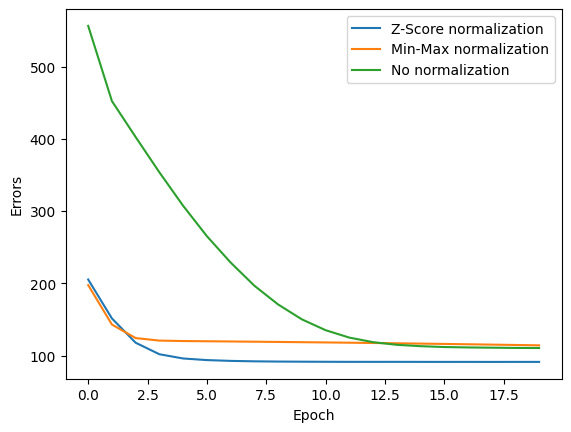

In [32]:
#plotting basic rmse history of the three different methods
charts.plot_training_losses(losses=[z_key, minmax_key, basic_key], df=together_df)

In [33]:
print("No normalization metrics:")
training_eval = basic_model.evaluate(training_df[my_feature], training_df[my_label])

print("Z-Score normalization metrics:")
validate_eval = z_model.evaluate(z_df[my_feature], z_df[my_label])

print("Min-Max normalization metrics:")
test_eval = minmax_model.evaluate(minmax_df[my_feature], minmax_df[my_label])

No normalization metrics:
532/532 [==============================] - 2s 4ms/step - loss: 12156.5098 - root_mean_squared_error: 110.2566
Z-Score normalization metrics:
532/532 [==============================] - 2s 4ms/step - loss: 8319.0557 - root_mean_squared_error: 91.2089
Min-Max normalization metrics:
532/532 [==============================] - 2s 4ms/step - loss: 12977.9951 - root_mean_squared_error: 113.9210


In [34]:
#sampling data
sample_normal = lib.create_inference_sample(training_df, my_feature, basic_model)
sample_z = lib.create_inference_sample(z_df, my_feature, z_model)
sample_minmax = lib.create_inference_sample(minmax_df, my_feature, minmax_model)

7/7 [==============================] - 0s 2ms/step


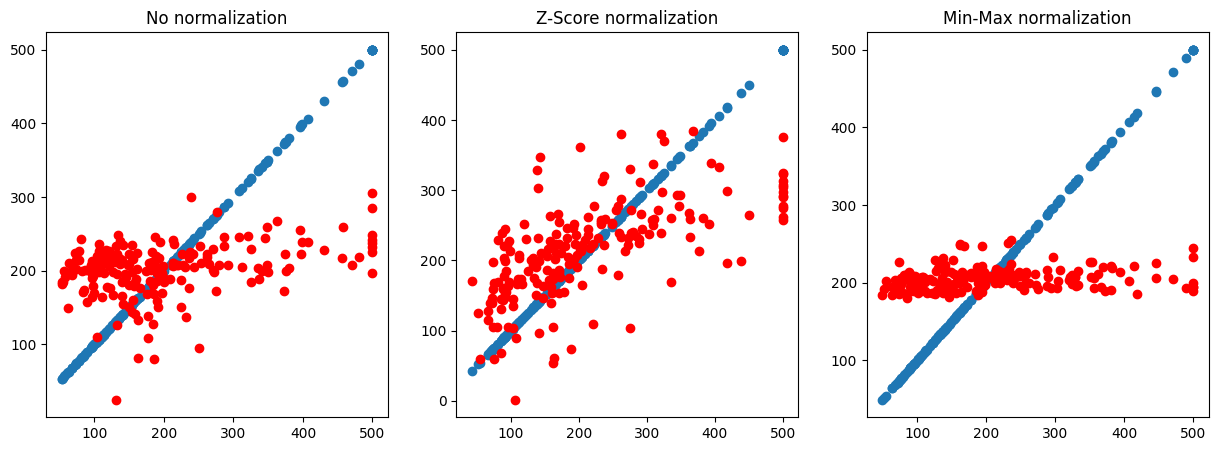

In [35]:
charts.plot_training_test_validat_accuracy(
    dfs=[sample_normal, sample_z, sample_minmax],
    label_key=my_label,
    titles=keys
)

In [36]:
#weights per features
weights = pd.DataFrame.from_dict({
    "feature" : my_feature,
    basic_key : basic_model.get_weights()[0].ravel(),
    z_key : z_model.get_weights()[0].ravel(),
    minmax_key : minmax_model.get_weights()[0].ravel(),
})

weights

,feature,No normalization,Z-Score normalization,Min-Max normalization
0,longitude,-1.222735,-149.968597,9.424031
1,latitude,1.542251,-157.948029,-29.885437
2,total_rooms,0.040511,99.809044,224.280319
3,total_bedrooms,-0.100004,-49.410770,-0.406265
4,population,-0.046657,-70.594872,-180.162720
5,households,0.036134,22.894577,51.638165
